Тема урока: итераторы
Магические методы (dunders)
Протокол итератора и итерируемого объекта
Особенности функции iter()
Аннотация. Урок посвящен протоколу итератора и магическим методам.

Магические методы

В Python существуют методы, которые редко вызываются напрямую, при этом они постоянно вызываются встроенными функциями и операторами, даже если мы об этом не знаем. Такие методы называются магическими и обрамляются двойным нижним подчеркиванием с двух сторон.

Использование магических методов позволяет сделать работу с создаваемыми пользователем объектами удобной за счет схожести с встроенными объектами языка.

Магические методы еще называют dunders(болваны) от double underscore (двойное нижнее подчеркивание).

Например, у объектов типа list есть магические методы __len__() и __str__(). Первый магический метод вызывается автоматически встроенной функцией len(), которая возвращает длину списка, второй метод вызывается встроенной функцией str(), которая возвращает строковое представление списка.

In [1]:
words = ['hello', 'beegeek', 'python']

print(len(words))  # за кулисами вызывается магический метод __len__()
print(str(words))  # за кулисами вызывается магический метод __str__()

3
['hello', 'beegeek', 'python']


Нам ничего не мешает вызвать указанные магические методы напрямую.

In [2]:
words = ['hello', 'beegeek', 'python']

print(words.__len__())
print(words.__str__())

3
['hello', 'beegeek', 'python']


На практике нам редко приходится явно вызывать магические методы. Обычно за нас это делают встроенные функции языка Python.

Посмотреть список всех методов и атрибутов Python объекта можно с помощью встроенной функции dir()

In [4]:
words = ['hello', 'beegeek', 'python']
print(dir(words))

['__add__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


Обратите внимание на то, что публичные методы, то есть методы которые вызываются явно (append(), count(), extend(), index() и т.д.), не имеют нижних подчеркиваний.

Протокол итерируемых объектов и итераторов

У всех итерируемых объектов есть магический метод __iter__(), который создаёт итератор на основе итерируемого объекта. Встроенная функция iter() вызывает за кулисами именно этот магический метод.

In [5]:
words = ['hello', 'beegeek', 'python']

iterator = iter(words)  # за кулисами вызывается метод words.__iter__()

print(type(words))
print(type(iterator))

<class 'list'>
<class 'list_iterator'>


У всех итераторов есть магический метод __next__(), который обеспечивает выдачу очередного элемента. Встроенная функция next() вызывает за кулисами именно этот магический метод. 

In [6]:
words = ['hello', 'beegeek', 'python']

iterator = iter(words)  # за кулисами вызывается метод words.__iter__()

print(next(iterator))  # за кулисами вызывается метод iterator.__next__()
print(next(iterator))  # за кулисами вызывается метод iterator.__next__()

hello
beegeek


Когда элементы в итераторе закончились, очередной вызов функции next() возбуждает исключение StopIteration

Если объект итератором не является, то есть у него нет магического метода __next__(), то вызов функции next() приведет к ошибке.

In [7]:
words = ['hello', 'beegeek', 'python']

print(next(words))

TypeError: 'list' object is not an iterator

У всех итераторов также есть и метод __iter__(), который возвращает сам итератор (сам себя). Таким образом, любой итератор является итерируемым объектом, но не наоборот, не любой итерируемый объект является итератором.

In [8]:
words = ['hello', 'beegeek', 'python']

iterator1 = iter(words)  # за кулисами вызывается метод words.__iter__()
iterator2 = iter(iterator1)  # за кулисами вызывается метод iterator1.__iter__()

print(iterator1 == iterator2)

True


Таким образом, если функции iter() передается итератор, то она возвращает его же. Если же функции iter() передать итерируемый объект, не являющийся итератором (например, список), то она вернет совсем другой объект – итератор на основе этого итерируемого объекта.

Возникает вопрос, для чего итераторы содержат магический метод __iter__(). Все дело в том, что цикл for ожидает, что у объекта, по которому идет итерирование, есть не только магический метод __next__(), но и __iter__(). Задача метода __iter__() – превращать итерируемый объект в итератор. Если в цикл for передается уже итератор, то метод __iter__() этого объекта должен возвращать сам объект.

Если циклу for передается не итератор, а итерируемый объект, то его метод __iter__() должен возвращать не сам объект, а итератор на основе этого итерируемого объекта.

Получается, в итераторах метод __iter__() нужен лишь для совместимости. Ведь если for работает как с итераторами, так и итерируемыми объектами, но последние требуют преобразования к итератору, и for вызывает __iter__() без оценки того, что ему передали, то требуется, чтобы оба – итератор (iterator) и итерируемый объект (iterable) – поддерживали этот метод. С точки зрения наличия в классе метода __iter__() итераторы можно считать подвидом итерируемых объектов.

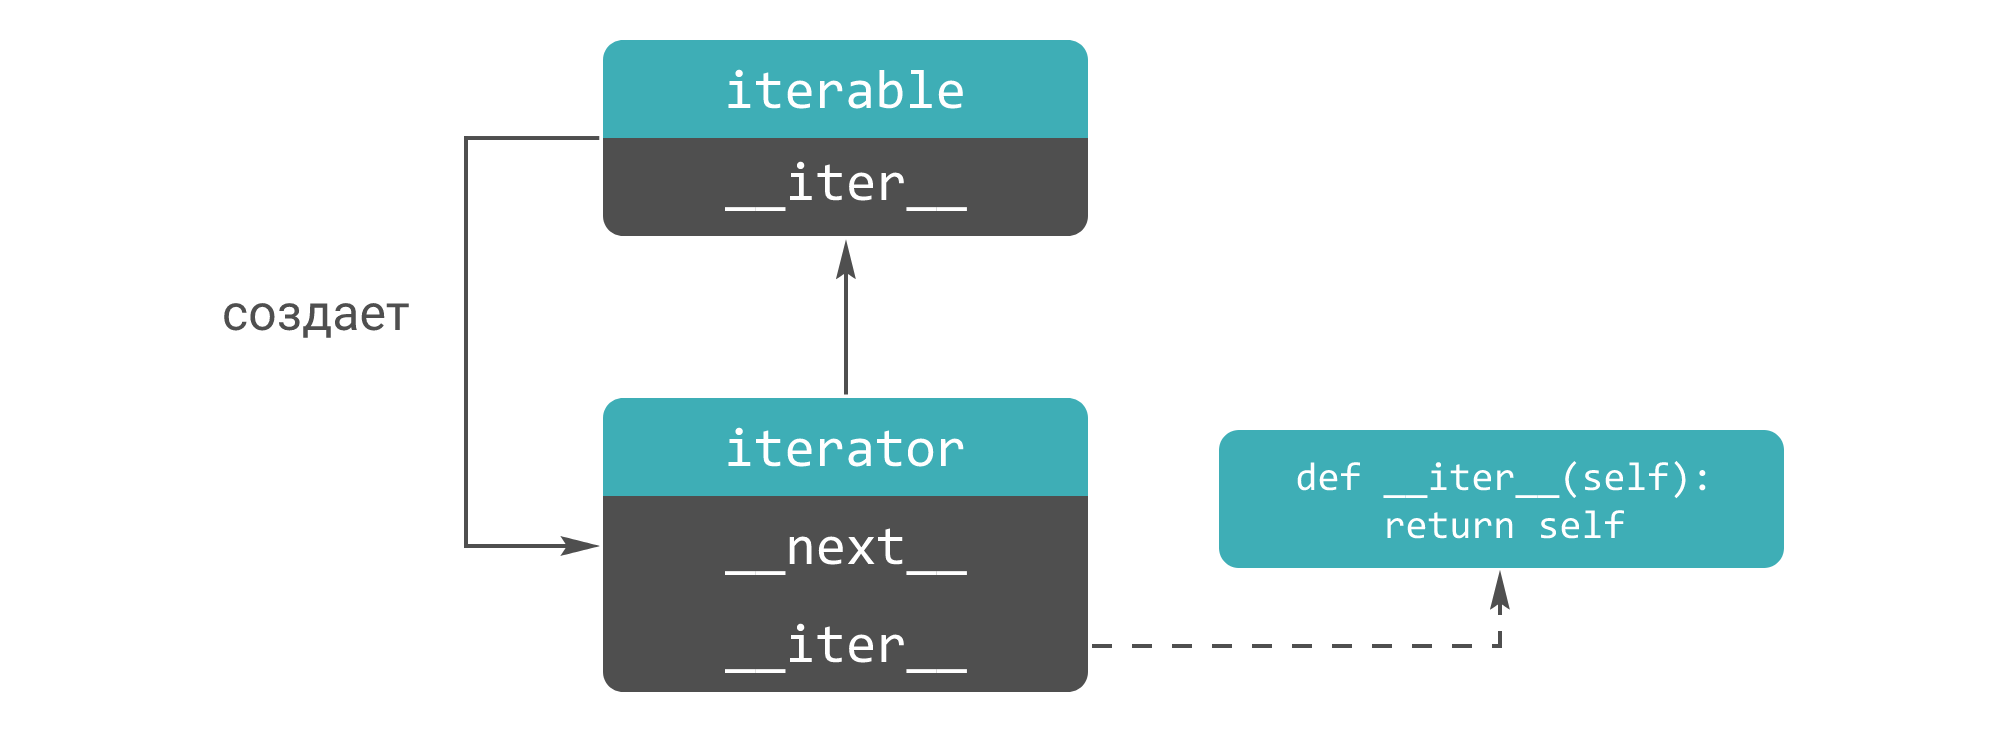

In [9]:
from functions import picture

picture('Новый проект (1) (9).png')

Протокол итератора

Теперь формализуем протокол итератора :

чтобы получить итератор, мы должны передать функции iter() итерируемый объект
далее мы передаём итератор функции next()
когда элементы в итераторе закончились, вызов функции next() возбуждает исключение StopIteration

Особенности:

любой объект, передаваемый функции iter() без исключения TypeError — итерируемый объект
любой объект, передаваемый функции next() без исключения TypeError — итератор
любой объект, передаваемый функции iter() и возвращающий сам себя — итератор

Любой итерируемый объект реализует протокол итератора.

Особенность функции iter()

Встроенная функция iter(), как мы уже знаем, преобразует итерируемый объект в итератор. Именно в таком виде функция используется в большинстве случаев.

iter(iterable) -> iterator

Однако мы можем использовать функцию iter() в еще одном полезном сценарии:

iter(callable, sentinel) -> iterator

Если функции iter() передается два аргумента, то первый аргумент callable должен являться функцией, а второй аргумент sentinel — некоторым стоп-значением. В этом случае, созданный итератор будет вызывать указанную функцию callable и проверять полученное значение на равенство со значением sentinel. Если полученное значение равно sentinel, то возбуждается исключение StopIteration, иначе итератор выдает значение, полученное из функции callable.

Например, с помощью функции iter() мы можем создать бесконечный итератор, генерирующий единственное значение — 0.

In [10]:
zero_iterator = iter(int, -1)

for i in range(5):
    print(next(zero_iterator))

print(type(zero_iterator))

0
0
0
0
0
<class 'callable_iterator'>


Функция int(), которую мы передаем в качестве первого аргумента в функцию iter(), всегда возвращает значение 0, при этом вторым аргументом (стоп-значением) является −1, которое не будет возвращено никогда. Таким образом, мы построили бесконечный итератор, генерирующий единственное нулевое значение.

Мы также можем написать итератор, который генерирует неопределенное количество случайных чисел.

In [11]:
from random import choice


def test_iter():
    values = list(range(1, 11))
    return choice(values)


random_iterator = iter(test_iter, 2)

for num in random_iterator:
    print(num)

7
1
7
9
10


Итератор random_iterator будет генерировать случайное число от 1 до 10 до тех пор, пока не будет возвращено число 2.

Одним из применений второго аргумента sentinel является чтение строк файла до тех пор, пока не будет достигнута строка sentinel

In [ ]:
with open('data.txt') as file:
    for line in iter(file.readline, ''):  # читаем, пока не попадется пустая строка 
        # Делаем что-то с line.
        pass

считывает строки текстового файл data.txt до тех пор, пока очередная строка не окажется пустой.

Примечания

Примечание 1. Итерируемый объект (iterable) и итератор (iterator) – это протоколы, правила.

Дополните приведенный ниже код, чтобы в переменной infinite_love содержался итератор, бесконечно генерирующий единственное значение — строку i love beegeek!.

In [15]:
infinite_love = iter(lambda: 'i love beegeek!', '')
print(next(infinite_love))

print(next(infinite_love))
print(next(infinite_love))
print(next(infinite_love))

i love beegeek!
i love beegeek!
i love beegeek!
i love beegeek!


Функция is_iterable()
Реализуйте функцию is_iterable(), которая принимает один аргумент:

obj — произвольный объект
Функция должна возвращать True, если объект obj является итерируемым объектом, или False в противном случае.

In [23]:
from typing import Any


def is_iterable(obj: Any) -> bool:
    if '__iter__' in dir(obj):
        return True
    return False


print(is_iterable(18731))
print(is_iterable('18731'))
objects = [(1, 13), 7.0004, [1, 2, 3]]
# print(dir(objects[0]))

for obj in objects:
    print(is_iterable(obj))

False
True
True
False
True


In [ ]:
def is_iterable(obj):
    return '__iter__' in dir(obj)

In [ ]:
def is_iterable(obj):
    return hasattr(obj, '__iter__')

Функция is_iterator()
Реализуйте функцию is_iterator(), которая принимает один аргумент:

obj — произвольный объект
Функция должна возвращать True, если объект obj является итератором, или False в противном случае. 

Примечание 1. В тестирующую систему сдайте программу, содержащую только необходимую функцию is_iterator(), но не код, вызывающий ее.

In [25]:
from typing import Any


def is_iterator(obj: Any):
    return hasattr(obj, '__next__')

def is_iterable(obj: Any):
    return '__next__' in dir(obj)


print(is_iterator([1, 2, 3, 4, 5]))

beegeek = map(str.upper, 'beegeek')
print(is_iterator(beegeek))

beegeek = filter(None, [0, 0, 1, 1, 0, 1])
print(is_iterator(beegeek))

False
True
True


Функция random_numbers()
Реализуйте функцию random_numbers(), которая принимает два аргумента:

left — целое число
right — целое число
Функция должна возвращать итератор, генерирующий бесконечную последовательность случайных целых чисел в диапазоне от left до right включительно.

Примечание 1. Гарантируется, что left <= right.

In [31]:
from random import choice


def random_numbers(left: int, right: int) -> iter:
    values = list(range(left, right + 1))
    return iter(lambda: choice(values), right + 2)

iterator = random_numbers(1, 1)
print(next(iterator))
print(next(iterator))

iterator = random_numbers(1, 10)
print(next(iterator) in range(1, 11))
print(next(iterator) in range(1, 11))
print(next(iterator) in range(1, 11))

1
1
True
True
True
